In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
#cargamos los datos
tweets_depresivos_df = pd.DataFrame(pd.read_excel("Preprocesamiento/Dataset_depresivo_Limpio.xlsx")) 
tweets_depresivos_df['sentimiento'] = 1 #tweets depresivos clasificados con 1

tweets_random_df = pd.DataFrame(pd.read_excel("Preprocesamiento/Dataset_random_Limpio.xlsx")) 
tweets_random_df['sentimiento'] = 0 #tweets depresivos clasificados con 0
#unimos ambos datasets y solo con conservamos las caracteristicas que vamos a usar 
tweet_data_df = pd.concat([tweets_depresivos_df, tweets_random_df]).reset_index()[["tweet_token", "sentimiento"]]
tweet_data_df.head()

,tweet_token,sentimiento
0,"['vez', 'valer', 'sentirse', 'agobiada', 'dese...",1
1,"['angustiado', 'maldicion', 'no', 'hacer', 'de...",1
2,"['cerre', 'nuevo', 'red', 'no', 'poder', 'tant...",1
3,"['depresion', 'crisis', 'ansiedad', 'ataque', ...",1
4,"['jajaja', 'ansiedad', 'social', 'no', 'nuevo'...",1


In [3]:
tweet_data_df = tweet_data_df.sample(frac=1).reset_index()[["tweet_token", "sentimiento"]]
tweet_data_df

,tweet_token,sentimiento
0,"['mañana', 'pierdo', 'batalla', 'depresion', '...",1
1,"['ansiedad', 'desperto']",1
2,"['ver', 'no', 'poder', 'hacer', 'uso', 'materi...",0
3,"['no', 'necesitar', 'decirle', 'gente', 'enoja...",0
4,"['preparado', 'yo', 'gustar', 'reto']",0
...,...,...
10992,"['grande', 'cuento', 'hadas', 'notas_musical']",0
10993,"['pretendo', 'engañar', 'fondo', 'decepcionada...",0
10994,"['nunca', 'yo', 'tanto', 'desesperado']",1
10995,"['depresion', 'celular', 'bateria', 'descompue...",1


## gfrafica

In [5]:

import os
import numpy as np
import matplotlib.pyplot as plt

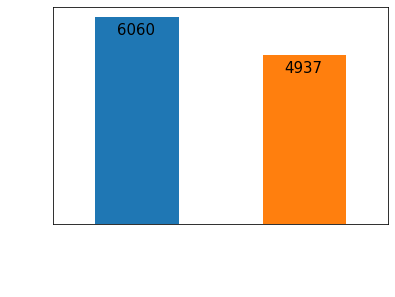

<Figure size 1296x1296 with 0 Axes>

In [64]:
f, ax = plt.subplots()#(figsize = (12,6))

col_map = plt.get_cmap('tab10') # color barras
tweet_data_df[['sentimiento']].value_counts().plot.bar(color=col_map.colors) 
# Create bars with different colors
labels = ['Aleatorio', 'Depresivo'] 
ax.set_ylabel('# Tweets')
ax.set_xlabel('Sentimiento')
#ax.set_title('clases')
plt.xticks(ax.get_xticks(), labels, rotation=50)  
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='both', colors='white')

for p in ax.patches: #añdir la cantidad en las barras
    ax.annotate(
        p.get_height(), xy=(p.get_x() + 0.13, p.get_height() - 500), fontsize=15
    )

plt.show()
